In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pygris
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

from epymorph.data import geo_library, ipm_library, mm_library
from epymorph.initializer import bird_movement_initializer
from epymorph.engine.standard_sim import StandardSimulation
from epymorph.simulation import TimeFrame

In [2]:
geo = geo_library['maricopa_cbg_2019']()

source_node = '040130927211'
birds = np.zeros(geo.nodes)
birds[np.where(geo['geoid'] == source_node)] = 50000
geo.values['bird_population'] = birds

In [3]:
sim = StandardSimulation(
    geo=geo,
    ipm=ipm_library['no'](),
    mm=mm_library['long_range_dispersal_birds'](),
    params={
        'alpha' : 2.5
    },
    time_frame=TimeFrame.of("2023-01-01", 10),
    initializer=bird_movement_initializer,
)

out = sim.run()

c:\Users\sp2665\Downloads\Sindhu\Research EpyMoRPH\Epymorph\epymorph\util.py:183: RuntimeWarning: divide by zero encountered in power
  ((normalize_distance / min_distance)**-alpha)  # type: ignore


In [4]:
df = pd.merge(
    left=pygris.block_groups(
        state="Arizona",
        county="Maricopa",
        year=2019,
    ),
    right=pd.DataFrame({
        'GEOID': geo['geoid'],
        'visitors': out.prevalence[0, :, 0],
    }),
    on='GEOID',
)

Using FIPS code '04' for input 'Arizona'
Using FIPS code '013' for input 'Maricopa'


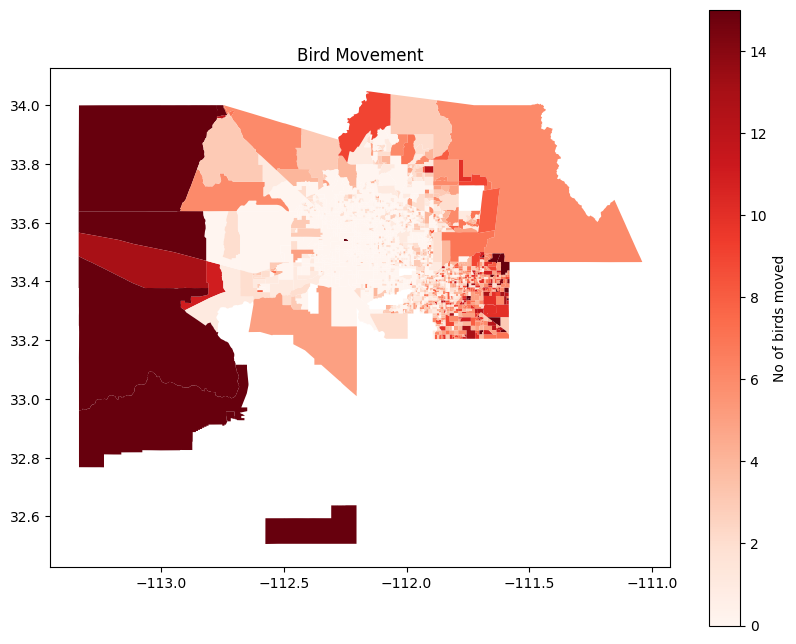

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))
norm = Normalize(vmin=0, vmax=15)
sm = ScalarMappable(cmap='Reds', norm=norm)
df.plot(ax=ax, color=sm.to_rgba(df['visitors'].to_numpy()))
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('No of birds moved')
plt.title('Bird Movement')
plt.show()